<a href="https://colab.research.google.com/github/Linaeid/Linaeid/blob/main/Task2StcTV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pyxlsb

In [4]:
import pandas as pd
import pyxlsb
import numpy as np

In [7]:
dataframe = pd.read_excel("stc.xlsx",index_col=0)

In [8]:
dataframe.shape

(86, 2)

In [9]:
dataframe.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [10]:
dataframe.head()


,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [11]:
dataframe.describe()

,Total_watch_time_in_houres
count,86.000000
mean,780.817926
std,122.992002
min,562.124722
25%,707.709653
50%,763.181389
75%,840.985278
max,1123.551944


In [12]:
dataframe.isnull().any()

date_                         False
Total_watch_time_in_houres    False
dtype: bool

In [17]:
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [14]:
dataframe.set_index('date_', inplace=True)

In [15]:
dataframe.head()

,Total_watch_time_in_houres
date_,
2018-01-01,1123.551944
2018-01-02,1000.129722
2018-01-03,881.924444
2018-01-04,782.669444
2018-01-05,1051.939444


In [18]:
fig = px.line(dataframe,  y="Total_watch_time_in_houres")
fig.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



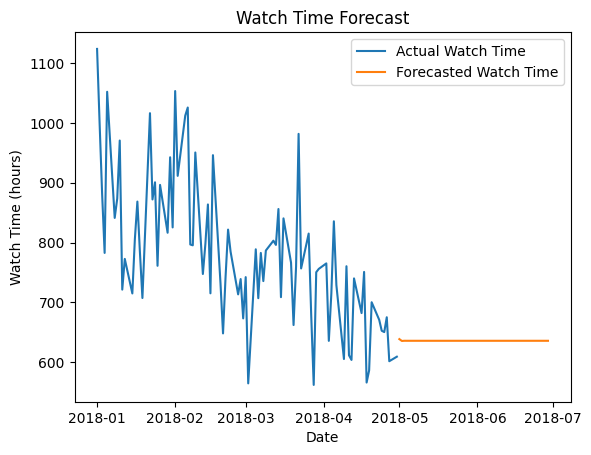

In [24]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_excel("stc.xlsx")

# Set the 'date_' column as the index
data.set_index('date_', inplace=True)

# Convert the index to datetime
data.index = pd.to_datetime(data.index)

# Select the specific variable for forecasting
watch_time = data['Total_watch_time_in_houres']

# Build the ARIMA model
model = ARIMA(watch_time, order=(1, 1, 1))  # You can adjust the order according to your data

# Fit the model
model_fit = model.fit()

# Forecast the next two months
forecast = model_fit.forecast(steps=60)  # Forecasting for 60 days (2 months)

# Plot the actual watch time
plt.plot(watch_time, label='Actual Watch Time')

# Plot the forecasted watch time
forecast_index = pd.date_range(start=watch_time.index[-1], periods=61, freq='D')[1:]  # Generate index for forecasted period
plt.plot(forecast_index, forecast, label='Forecasted Watch Time')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Watch Time (hours)')
plt.title('Watch Time Forecast')

# Show legend
plt.legend()

# Display the plot
plt.show()
